In [1]:
#Author - Rizlan
#20223256/w1987516

Installing Pandas on Notebook-02

In [2]:
!pip install pandas

# **Import Required Libraries**

In [3]:
import pandas as pd
#Importing Ploty to plot Diagrams
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import GaussianNB

from sklearn.linear_model import LogisticRegression

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay


# **Loading CSV to DataFrame**

In [4]:
df = pd.read_csv('/content/drive/MyDrive/ML-CW/Mortality_Status.csv')

Checking the shape - [colums and Rows] of the dataset

In [5]:
df.shape

(3254, 14)

Checking the Data contents

In [6]:
#displaying first five rows
df.head()

,Age,Sex,T_Stage,N_Stage,6th_Stage,Differentiated,Grade,A_Stage,Tumor_Size,Estrogen_Status,Progesterone_Status,Regional_Node_Examined,Reginol_Node_Positive,Mortality_Status
0,68,0,0,0,0,2,3,0,4,1,1,24,1,1
1,50,0,1,1,2,1,2,0,35,1,1,14,5,1
2,58,0,2,2,4,1,2,0,63,1,1,14,7,1
3,58,0,0,0,0,2,3,0,18,1,1,2,1,1
4,47,0,1,0,1,2,3,0,41,1,1,3,1,1


List Of Columns in CW dataset

In [7]:
# Program to print all the column names of the data_frame
list(df.columns)

['Age',
 'Sex',
 'T_Stage',
 'N_Stage',
 '6th_Stage',
 'Differentiated',
 'Grade',
 'A_Stage',
 'Tumor_Size',
 'Estrogen_Status',
 'Progesterone_Status',
 'Regional_Node_Examined',
 'Reginol_Node_Positive',
 'Mortality_Status']

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3254 entries, 0 to 3253
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     3254 non-null   int64
 1   Sex                     3254 non-null   int64
 2   T_Stage                 3254 non-null   int64
 3   N_Stage                 3254 non-null   int64
 4   6th_Stage               3254 non-null   int64
 5   Differentiated          3254 non-null   int64
 6   Grade                   3254 non-null   int64
 7   A_Stage                 3254 non-null   int64
 8   Tumor_Size              3254 non-null   int64
 9   Estrogen_Status         3254 non-null   int64
 10  Progesterone_Status     3254 non-null   int64
 11  Regional_Node_Examined  3254 non-null   int64
 12  Reginol_Node_Positive   3254 non-null   int64
 13  Mortality_Status        3254 non-null   int64
dtypes: int64(14)
memory usage: 356.0 KB


Null Check

In [9]:
df.isnull().sum()

,0
Age,0
Sex,0
T_Stage,0
N_Stage,0
6th_Stage,0
Differentiated,0
Grade,0
A_Stage,0
Tumor_Size,0
Estrogen_Status,0


# **Data Pre-Processing (Preparation)**

We have no Nulls and Outliers are removes , now we have to standaize

The Features are already Transformed

Then we have to take the Feature Columns and targeted feature

In [10]:
feature_columns = ['Age','Sex','T_Stage','N_Stage','6th_Stage','Differentiated','Grade','A_Stage','Tumor_Size','Estrogen_Status','Progesterone_Status','Regional_Node_Examined','Reginol_Node_Positive']
X = df[feature_columns] # Features
y = df['Mortality_Status'] #Targeted Features

## Splitting Data into Train and Test

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)
#Feature List
print(X.columns.tolist())
print('WholeData',df.shape)

#Shape Of Train Data
print('TrainData',X_train.shape)
#Shape Of Test Data
print('TestData',X_test.shape)


['Age', 'Sex', 'T_Stage', 'N_Stage', '6th_Stage', 'Differentiated', 'Grade', 'A_Stage', 'Tumor_Size', 'Estrogen_Status', 'Progesterone_Status', 'Regional_Node_Examined', 'Reginol_Node_Positive']
WholeData (3254, 14)
TrainData (2277, 13)
TestData (977, 13)


In [12]:
SS = StandardScaler()
X_train = SS.fit_transform(X_train)
X_test = SS.transform(X_test)

There are different Magnitudes in the dataset , this can be affect the logistic regression (Classification) we have to Standadize those using sklearn StandardScaler

Xscale = X-mean/std

# **Modeling With GaussianNB**

Modeling with NB with no Parameters

In [13]:
# instantiate the model
BCSD_NB_model_NoPrior = GaussianNB()
BCSD_NB_model_NoPrior.fit(X_train, y_train)


GaussianNB()

Predict Unseen Data

In [14]:
#Testing With Test Data
y_Nb_predicted = BCSD_NB_model_NoPrior.predict(X_test)

## Evaluation Of GaussianNB

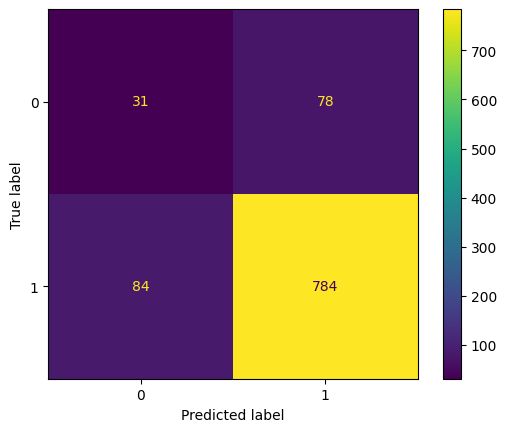

In [15]:
# Construct the confusion matrix cm
cm_for_NB = confusion_matrix(y_test, y_Nb_predicted, labels=BCSD_NB_model_NoPrior.classes_)
# Create a display to plot the confusion matrix
display_cm_for_NB = ConfusionMatrixDisplay(cm_for_NB,display_labels=BCSD_NB_model_NoPrior.classes_)
display_cm_for_NB.plot()


In [16]:
print("Classification Report For GaussianNB")
print(classification_report(y_test,y_Nb_predicted))


Classification Report For GaussianNB
              precision    recall  f1-score   support

           0       0.27      0.28      0.28       109
           1       0.91      0.90      0.91       868

    accuracy                           0.83       977
   macro avg       0.59      0.59      0.59       977
weighted avg       0.84      0.83      0.84       977



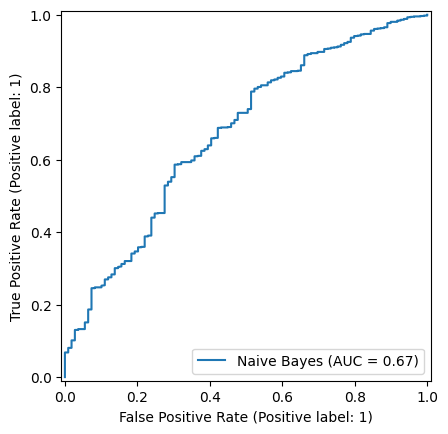

In [17]:
# Apply the function by specifying the name of your model and test data.
# Roc_For_NB = RocCurveDisplay.from_estimator(nb_model, X_test_ScaledData, y_test)
RocCurveDisplay.from_estimator(BCSD_NB_model_NoPrior, X_test, y_test, name="Naive Bayes")


## **Modeling NB with Priors**

Applied Priors to NB (Parametrer)

In [18]:
# instantiate the model
# BCSD_NB_model = GaussianNB()
BCSD_NB_model = GaussianNB(priors=[0.5,0.5])
# Equal Occurance - Since Low Data in Death
BCSD_NB_model.fit(X_train, y_train)


GaussianNB(priors=[0.5, 0.5])

Create a Gaussian Naive Bayes model that assumes both 'Dead' and 'Alive' classes are equally likely before seeing any data

https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html#sklearn.naive_bayes.BernoulliNB

Predicting the Unseen Data

In [19]:
#Testing With Test Data
y_Nb_predicted = BCSD_NB_model.predict(X_test)

## Evaluation Of GaussianNB with Prior

Confusion Matrix For Naive Bais

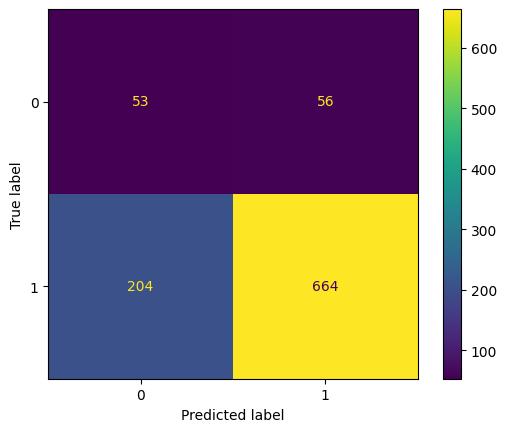

In [20]:
# Construct the confusion matrix cm
cm_for_NB = confusion_matrix(y_test, y_Nb_predicted, labels=BCSD_NB_model.classes_)
# Create a display to plot the confusion matrix
display_cm_for_NB = ConfusionMatrixDisplay(cm_for_NB,display_labels=BCSD_NB_model.classes_)
display_cm_for_NB.plot()


Classification Report For NB

In [21]:
print("Classification Report For GaussianNB with Prior")
print(classification_report(y_test,y_Nb_predicted))


Classification Report For GaussianNB with Prior
              precision    recall  f1-score   support

           0       0.21      0.49      0.29       109
           1       0.92      0.76      0.84       868

    accuracy                           0.73       977
   macro avg       0.56      0.63      0.56       977
weighted avg       0.84      0.73      0.78       977



ROC Curve For NB

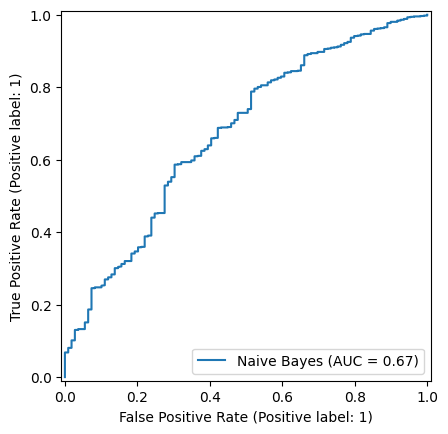

In [22]:
# Apply the function by specifying the name of your model and test data.
# Roc_For_NB = RocCurveDisplay.from_estimator(nb_model, X_test_ScaledData, y_test)
RocCurveDisplay.from_estimator(BCSD_NB_model, X_test, y_test, name="Naive Bayes")


# **Modeling With Logistic Regesstion**

In [23]:
# instantiate the model

BCSD_LR_Model = LogisticRegression()

#Training The Module
BCSD_LR_Model.fit(X_train,y_train)

LogisticRegression()

The Slope and the Gradient that got from Training the Model

In [24]:
BCSD_LR_Model_slope = BCSD_LR_Model.coef_
#cofficient
BCSD_LR_Model_intercept = BCSD_LR_Model.intercept_
#intercept
print('Slope', BCSD_LR_Model_slope)

print('Intercept', BCSD_LR_Model_intercept)

Slope [[-0.35837912  0.03614656 -0.10894648 -0.02985552 -0.12053313 -0.16707007
  -0.16707007 -0.0411209  -0.02428474  0.16402021  0.17401165  0.21746546
  -0.20126505]]
Intercept [2.28103651]


In [25]:
#Now make predictions for Train data
y_LR_Train_predicted = BCSD_LR_Model.predict(X_train)

#Now make predictions for Test data
y_LR_predicted = BCSD_LR_Model.predict(X_test)

## **Evaluation of Loggistic Regression**

Now we have to Plot the Confusion MAtrix to see how well our model Perfomed

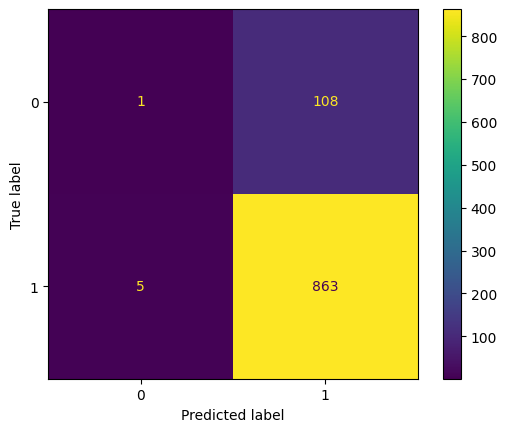

In [26]:
# Construct the confusion matrix cm
cm_for_LR = confusion_matrix(y_test, y_LR_predicted, labels=BCSD_LR_Model.classes_)
# Create a display to plot the confusion matrix
display_cm_for_LR = ConfusionMatrixDisplay(cm_for_LR,display_labels=BCSD_LR_Model.classes_)
display_cm_for_LR.plot()




---


Now We can Take Accuracy Score

Accuracy Score  =  Total Correct Predictions /  All Predictions

In [27]:
print("Classification Report For LogisticRegression")
print(classification_report(y_test,y_LR_predicted))

Classification Report For LogisticRegression
              precision    recall  f1-score   support

           0       0.17      0.01      0.02       109
           1       0.89      0.99      0.94       868

    accuracy                           0.88       977
   macro avg       0.53      0.50      0.48       977
weighted avg       0.81      0.88      0.84       977



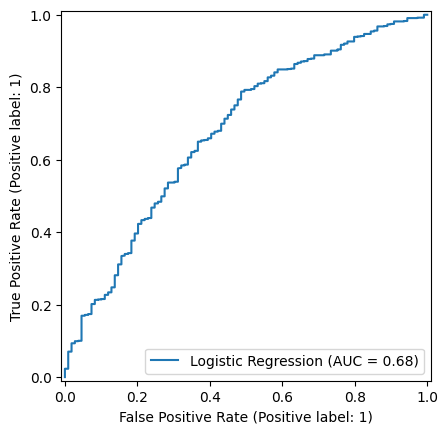

In [28]:
Roc_For_LR = RocCurveDisplay.from_estimator(BCSD_LR_Model, X_test, y_test, name="Logistic Regression")


# **Modeling With Logistic Regesstion With Class_Weight**

In [29]:
# instantiate the model
#Since Data is imbalance i Balance the Weight (Low weight Higher priority)
BCSD_LR_Model = LogisticRegression(class_weight='balanced')

# BCSD_LR_Model = LogisticRegression()

#Training The Module
BCSD_LR_Model.fit(X_train,y_train)

LogisticRegression(class_weight='balanced')

 class_weight='balanced' --> *tells the model to automatically adjust the weights of the classes inversely proportional to their frequencies in the data.*
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html



The Slope and the Gradient that got from Training the Model with class_weight Balanced

In [30]:
BCSD_LR_Model_slope = BCSD_LR_Model.coef_
#cofficient
BCSD_LR_Model_intercept = BCSD_LR_Model.intercept_
#intercept
print('Slope', BCSD_LR_Model_slope)

print('Intercept', BCSD_LR_Model_intercept)

Slope [[-0.36824023  0.04215489 -0.06877582  0.07065246 -0.27033065 -0.17790558
  -0.17790558 -0.01212976 -0.01154203  0.15928905  0.18375185  0.19972234
  -0.20789216]]
Intercept [0.21135626]


In [31]:
#Now make predictions for Train data
y_LR_Train_predicted = BCSD_LR_Model.predict(X_train)

#Now make predictions for Test data
y_LR_predicted = BCSD_LR_Model.predict(X_test)

In [32]:
Comparison_df_test = pd.DataFrame({'Actual_Mortality_Status':y_test,'Predicted_Mortality_Status':y_LR_predicted})
Comparison_df_test

,Actual_Mortality_Status,Predicted_Mortality_Status
1561,1,1
209,1,1
1249,1,1
190,1,0
155,1,1
...,...,...
1031,1,0
922,1,1
497,1,1
795,1,0


In [33]:
Comparison_df_train = pd.DataFrame({'Actual_Mortality_Status_Train_Data':y_train,'Predicted_Mortality_Status_Train_Data':y_LR_Train_predicted})
Comparison_df_train

,Actual_Mortality_Status_Train_Data,Predicted_Mortality_Status_Train_Data
2258,1,0
276,1,0
95,1,0
1785,1,0
3071,1,0
...,...,...
1914,1,1
834,1,1
2408,1,1
2430,1,1


## **Evaluation of Loggistic Regression with class_weight = balanced**

Now we have to Plot the Confusion MAtrix to see how well our model Perfomed

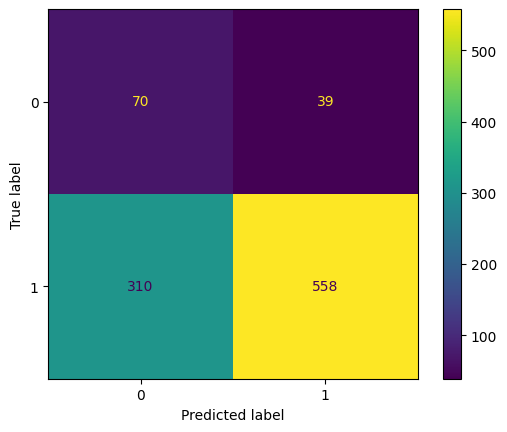

In [34]:
# Construct the confusion matrix cm
cm_for_LR = confusion_matrix(y_test, y_LR_predicted, labels=BCSD_LR_Model.classes_)
# Create a display to plot the confusion matrix
display_cm_for_LR = ConfusionMatrixDisplay(cm_for_LR,display_labels=BCSD_LR_Model.classes_)
display_cm_for_LR.plot()


**logisticRegression Results **

True Label is True And Predicted True(Positive) - *True Positive*  - 380

True Label is False And Predicted True(Positive) - *False Positive*  - 33

True Label is True And Predicted False(Negative) - *True Negative*  - 39

True Label is False And Predicted False(Negative) - *False Negative*  - 199

Patient Who have Alive and Predicted Alive = 380

Patient Who Have Dead But Predicted as Alive = 33

Patient Who are Dead And Predicted as Dead = 39

Patient Who are Alive But Predicted as Dead = 199




---


Now We can Take Accuracy Score

Accuracy Score  =  Total Correct Predictions /  All Predictions

In [35]:
# Apply the function to find the correct predictions
accuracy = accuracy_score(y_test,y_LR_predicted)
# Display the accuracy
print ('The Logistic Regression Model Accuracy:',accuracy)


The Logistic Regression Model Accuracy: 0.6427840327533265


This suggest that the Accuracy of this Model is 68%

In [36]:
print("Classification Report For LogisticRegression(class_weight='balanced')")
print(classification_report(y_test,y_LR_predicted))

Classification Report For LogisticRegression(class_weight='balanced')
              precision    recall  f1-score   support

           0       0.18      0.64      0.29       109
           1       0.93      0.64      0.76       868

    accuracy                           0.64       977
   macro avg       0.56      0.64      0.52       977
weighted avg       0.85      0.64      0.71       977



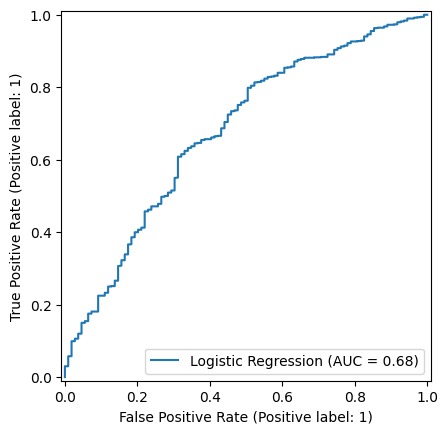

In [37]:
Roc_For_LR = RocCurveDisplay.from_estimator(BCSD_LR_Model, X_test, y_test, name="Logistic Regression")


## **Modeling Logisric Regression with Hyperparameters**

defining the CV

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

BCSD_LR_Model = LogisticRegression(class_weight='balanced')

# refined param grid with only valid combinations
param_grid = [
    {'solver': ['liblinear'], 'penalty': ['l1', 'l2'], 'C': [0.01, 0.1, 1, 10, 100]},
    {'solver': ['lbfgs'], 'penalty': ['l2'], 'C': [0.01, 0.1, 1, 10, 100]}
]

# param_grid = {
#     'C': [0.01, 0.1, 1, 10, 100],
#     'solver': [ 'lbfgs'],
#     'penalty': ['l1', 'l2']
# }

# cross-validation
BCSD_LR_Hyp_Model = GridSearchCV(BCSD_LR_Model, param_grid, cv=5, scoring='f1')

# Fit model
BCSD_LR_Hyp_Model.fit(X_train, y_train)

#Print Best estimator
print("Best Parameters:", BCSD_LR_Hyp_Model.best_params_)


Best Parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}


Applying the best parameters to the model

In [39]:

#predictions for Test data
y_LR_predicted = BCSD_LR_Hyp_Model.predict(X_test)

Confusion matrix for Hyperparameterized LR

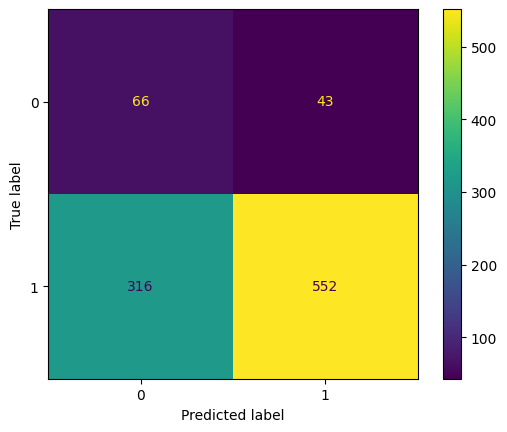

In [40]:
# confusion matrix cm
cm_for_LR = confusion_matrix(y_test, y_LR_predicted, labels=BCSD_LR_Hyp_Model.classes_)
# display to plot the confusion matrix
display_cm_for_LR = ConfusionMatrixDisplay(cm_for_LR,display_labels=BCSD_LR_Hyp_Model.classes_)
display_cm_for_LR.plot()


Classification Report

In [41]:
print("Classification Report For LogisticRegression(class_weight='balanced') \nand Hyperparametreized")
print(classification_report(y_test,y_LR_predicted))

Classification Report For LogisticRegression(class_weight='balanced') 
and Hyperparametreized
              precision    recall  f1-score   support

           0       0.17      0.61      0.27       109
           1       0.93      0.64      0.75       868

    accuracy                           0.63       977
   macro avg       0.55      0.62      0.51       977
weighted avg       0.84      0.63      0.70       977



# **Modeling With Knn**

In [42]:
knn_with_No_hyp = KNeighborsClassifier()

knn_with_No_hyp.fit(X_train,y_train)

KNeighborsClassifier()

In [43]:
y_Knn_pred = knn_with_No_hyp.predict(X_test)

Classification Report For Knn
              precision    recall  f1-score   support

           0       0.17      0.04      0.06       109
           1       0.89      0.98      0.93       868

    accuracy                           0.87       977
   macro avg       0.53      0.51      0.50       977
weighted avg       0.81      0.87      0.83       977



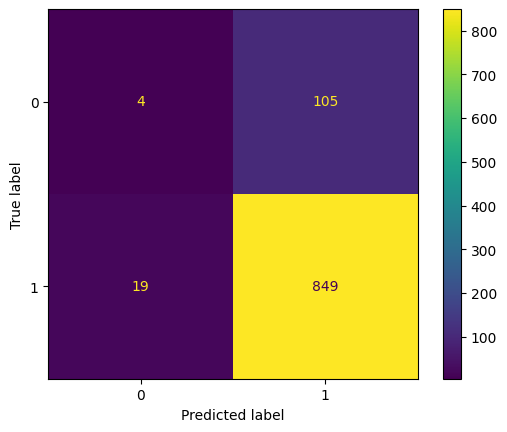

In [44]:
# Construct a confusion matrix
cm_knn_gscv = confusion_matrix(y_test, y_Knn_pred, labels = knn_with_No_hyp.classes_)
disp_knn_gscv_cm = ConfusionMatrixDisplay(cm_knn_gscv, display_labels=knn_with_No_hyp.classes_)
disp_knn_gscv_cm.plot()
# Display the classification report

print("Classification Report For Knn")
print(classification_report(y_test, y_Knn_pred))

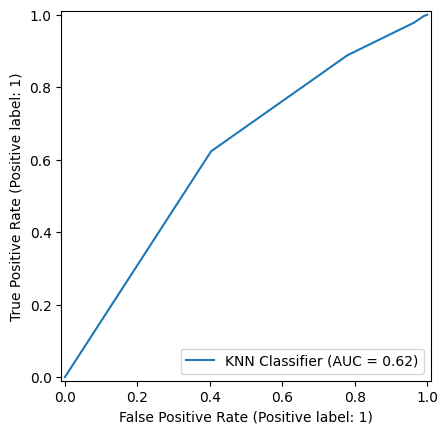

In [45]:
# Apply the function by specifying the name of your model and test data.
Roc_For_KNN = RocCurveDisplay.from_estimator(knn_with_No_hyp, X_test, y_test, name="KNN Classifier")



# **Finding a Good Hyperparameter**

Gridsearch CV

In [46]:
#create new a knn model
knn = KNeighborsClassifier()


param_grid = {
    'n_neighbors': range(1, 35),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

BCSD_knn_gscv = GridSearchCV(knn, param_grid, cv = 5)

#fit model to data
BCSD_knn_gscv.fit(X_train,y_train)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': range(1, 35),
                         'weights': ['uniform', 'distance']})

In [47]:
# Check top performing n_neighbors’ value
BCSD_knn_gscv.best_params_

{'metric': 'euclidean', 'n_neighbors': 19, 'weights': 'uniform'}

# **Modeling WIth Hyper Parameterized KNN**

In [48]:
# Perform testing on test dataset
y_BCSD_knn_gscv_predicted = BCSD_knn_gscv.predict(X_test)

## Evaluation of KNN

Classification Report For HyperParameterized Knn
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       109
           1       0.89      1.00      0.94       868

    accuracy                           0.89       977
   macro avg       0.44      0.50      0.47       977
weighted avg       0.79      0.89      0.84       977



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


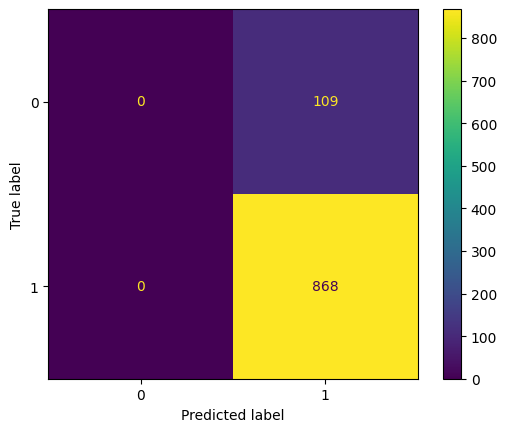

In [49]:
# Construct a confusion matrix
cm_knn_gscv = confusion_matrix(y_test, y_BCSD_knn_gscv_predicted, labels = BCSD_knn_gscv.classes_)
disp_knn_gscv_cm = ConfusionMatrixDisplay(cm_knn_gscv, display_labels=BCSD_knn_gscv.classes_)
disp_knn_gscv_cm.plot()
# Display the classification report
print("Classification Report For HyperParameterized Knn")
print(classification_report(y_test, y_BCSD_knn_gscv_predicted))



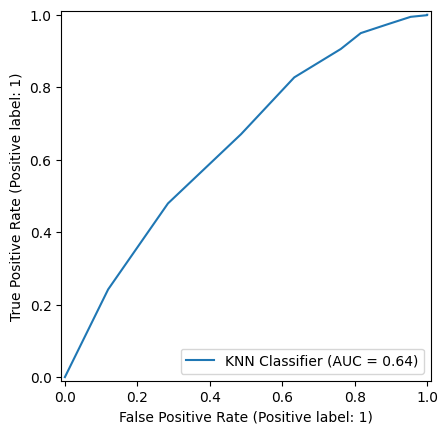

In [50]:
# Apply the function by specifying the name of your model and test data.
Roc_For_KNN = RocCurveDisplay.from_estimator(BCSD_knn_gscv, X_test, y_test, name="KNN Classifier")

